<a href="https://colab.research.google.com/github/avinash-tiwary/HydroDynamic-Solver/blob/main/Hydrodynamic_solver_2103121006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TVD- Total Variation Diminishing Scheme...... It helps in predicting and dealing with sharper shocks. Moreover, in the scheme  we don't see oscillations in the solution since in TVD, the total variation shouldn't be greater than what it was in the previous step. In more technical words, TVD scheme is monotonicity preserving.

Slope Limitrs- they limit the value of U at the interface. whenever the value of  U changes by a very large amount, e.g.  U(i-1)=-100 and U(i)=100, then we use slope limiters to control the variation.

Flux Limiters- they limit the flux 'f' at the interface, and hence help in resolving the shocks better.


##Doner Cell

In [ ]:
#importing required libarries
import numpy as np
import matplotlib.pyplot as plt


#Creating Mesh of 200 grid points
Nx = 200
x_min , x_max = (-10, 10)
x = np.linspace(x_min, x_max, Nx)
dx = (x_max - x_min)/(Nx-1)

#Defining time for advection
t_min, t_max = (0, 25)
dt = 0.01 
Nt = int((t_max - t_min)/dt)
t = np.linspace(t_min, t_max, Nt+1)

#Constants
sigma = 1
lamb = 3.0
r = dt/dx



    
y = np.zeros(Nx)
for i in range(Nx):
  if -0.499 < x[i] < 0.501:
    y[i] = 2
  else:
    y[i]=0


q = np.zeros([Nt+1, Nx])
# u = np.zeros(Nt+1, Nx)
q[0, : ] = y
a = 1

for n in range(0, Nt):

  for i in range(1, Nx-1):
    f1 = 0.5*lamb*2*q[n,i-1] + 0.5*lamb*(1-r*lamb)*a*(q[n,i] - q[n, i-1])
    f2 = 0.5*lamb*2*q[n,i] + 0.5*lamb*(1-r*lamb)*a*(q[n,i+1] - q[n, i])
    q[n+1,i] = q[n,i] + r*(f1 - f2)

  f1 = 0.5*lamb*2*q[n,Nx-1] + 0.5*lamb*(1-r*lamb)*a*(q[n,0] - q[n, Nx-1])
  f2 = 0.5*lamb*2*q[n,0] + 0.5*lamb*(1-r*lamb)*a*(q[n,1] - q[n, 0])
  q[n+1,0] = q[n,0] + r*(f1 - f2)  

  f1 = 0.5*lamb*2*q[n,Nx-2] + 0.5*lamb*(1-r*lamb)*a*(q[n,Nx-1] - q[n, Nx-2])
  f2 = 0.5*lamb*2*q[n,Nx-1] + 0.5*lamb*(1-r*lamb)*a*(q[n,0] - q[n, Nx-1])
  q[n+1,Nx-1] = q[n,Nx-1] + r*(f1 - f2)    

  if n % 25 == 0:
    plt.plot(x, q[n])
    plt.title(f'At time t = {t[n]}')
    plt.ylim(0,2.25)
    plt.show()

```Problem 2```

## VANLEER Method for square pulse advection

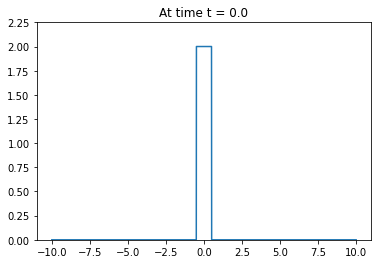

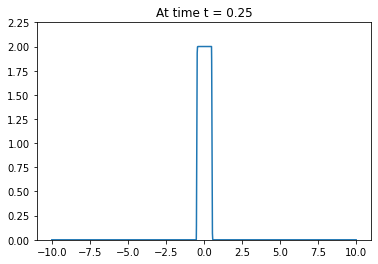

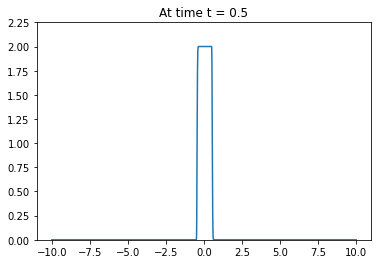

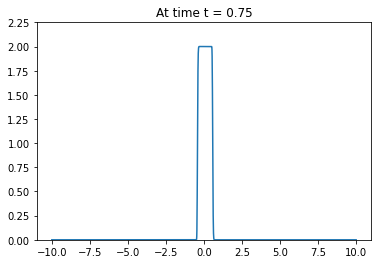

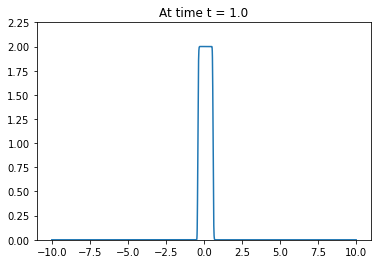

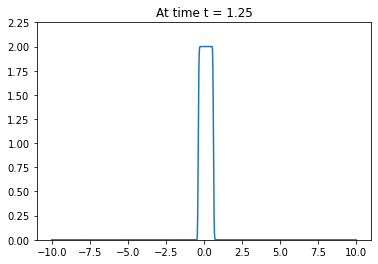

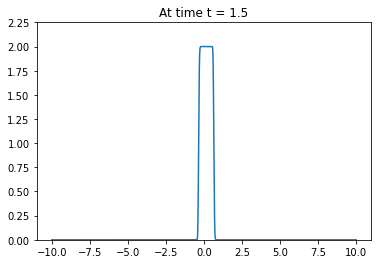

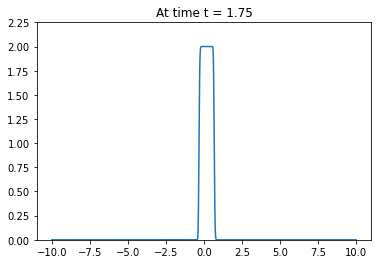

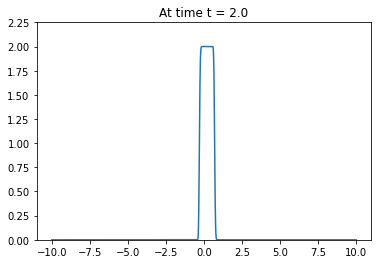

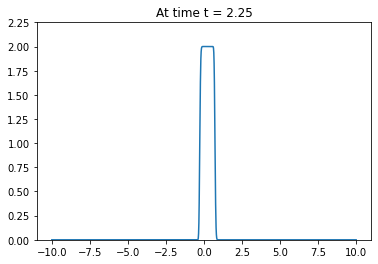

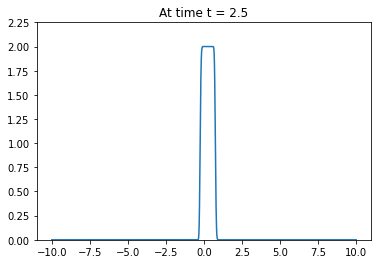

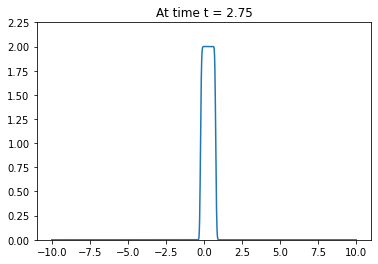

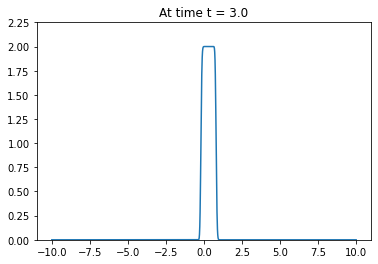

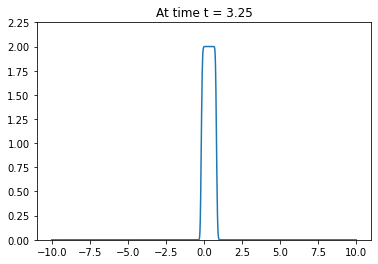

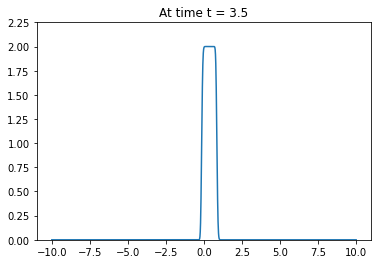

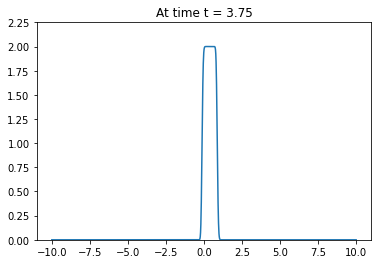

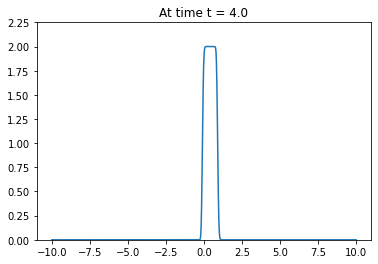

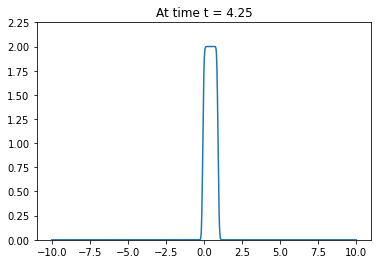

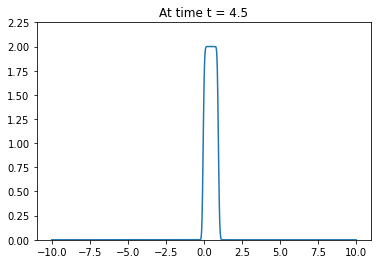

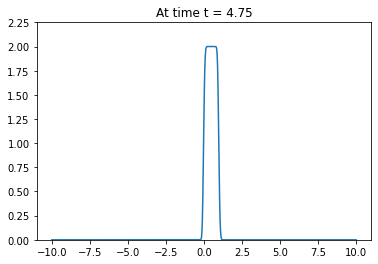

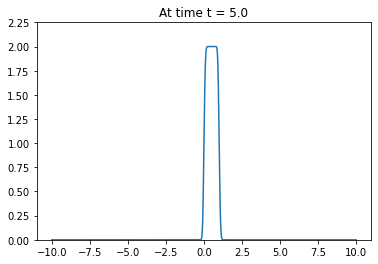

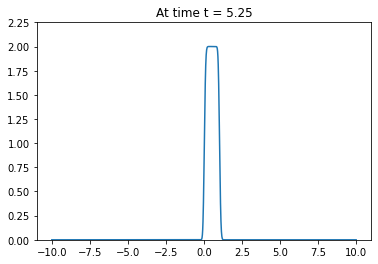

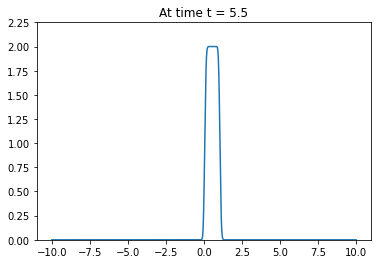

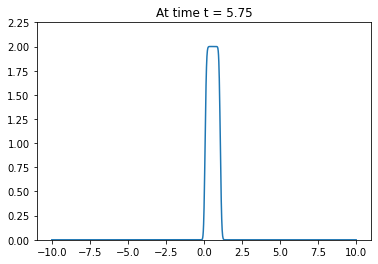

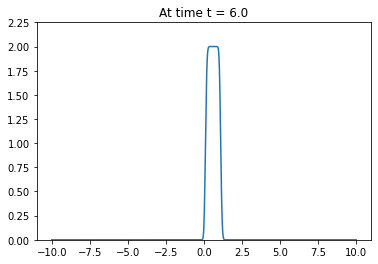

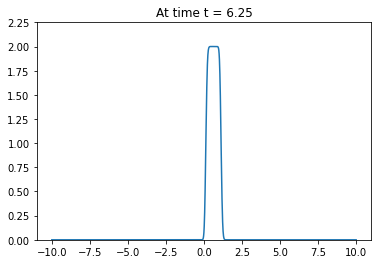

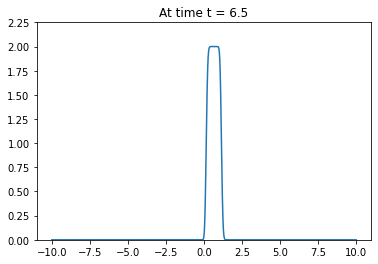

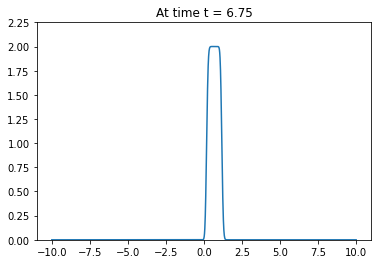

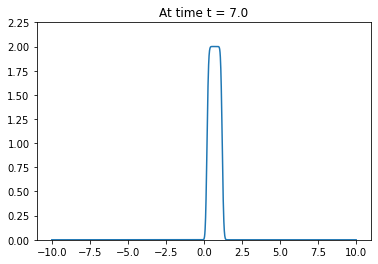

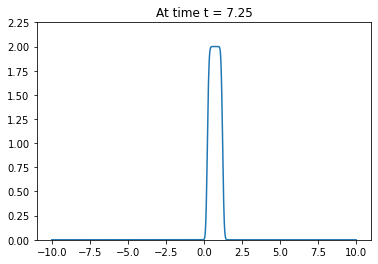

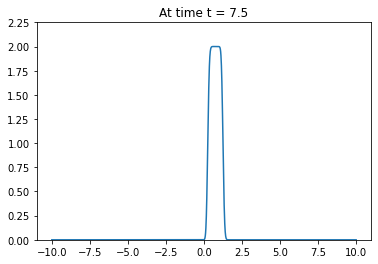

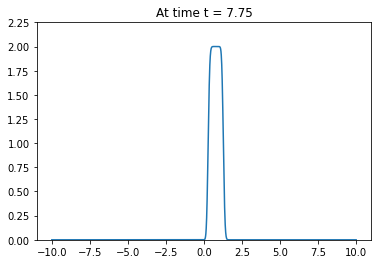

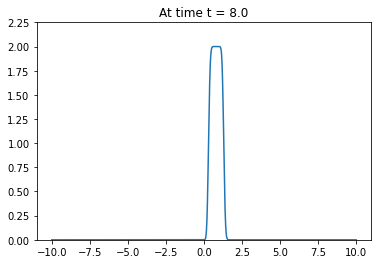

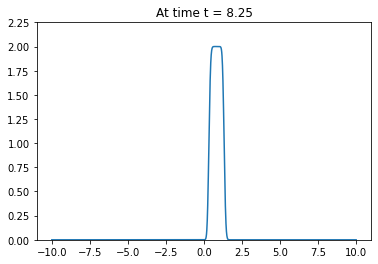

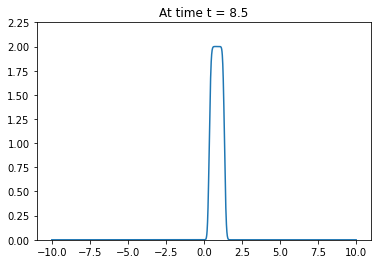

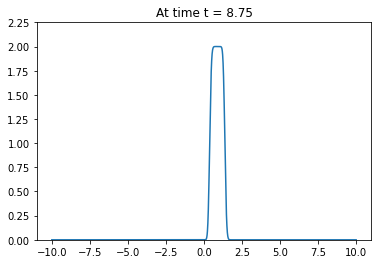

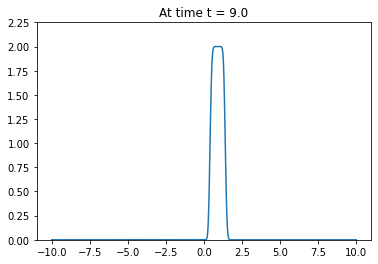

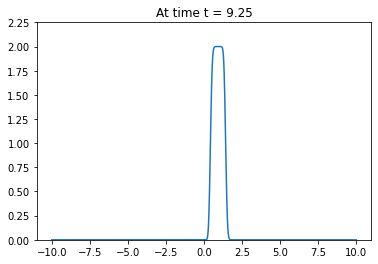

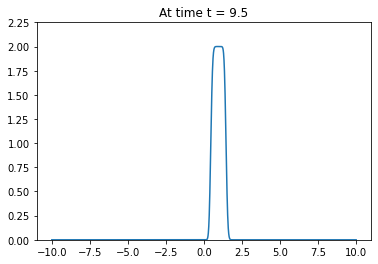

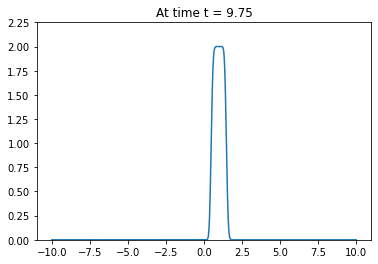

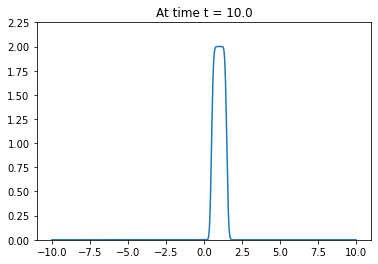

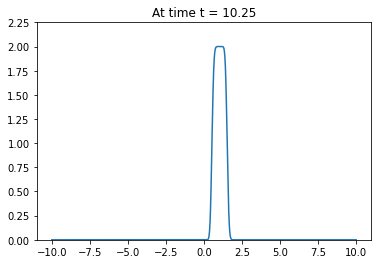

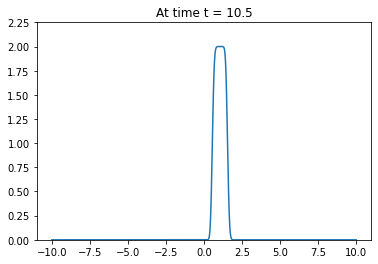

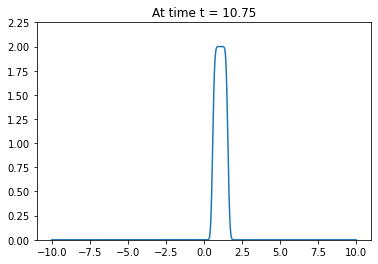

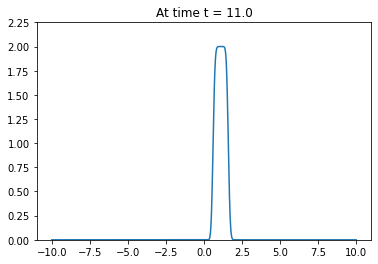

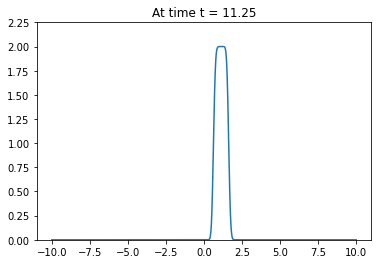

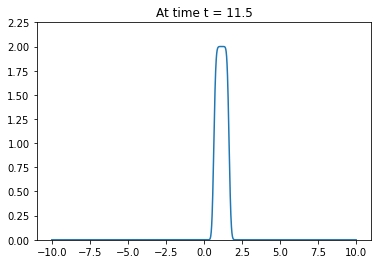

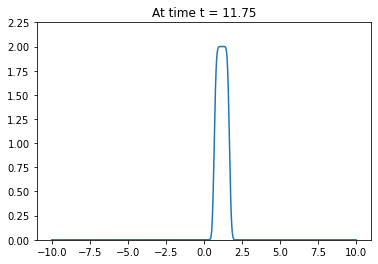

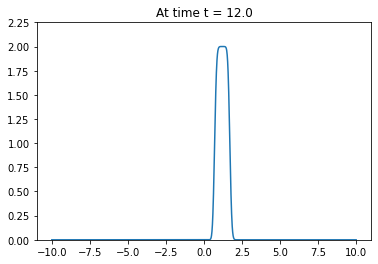

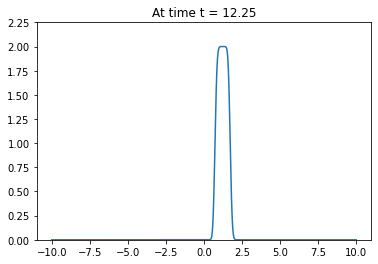

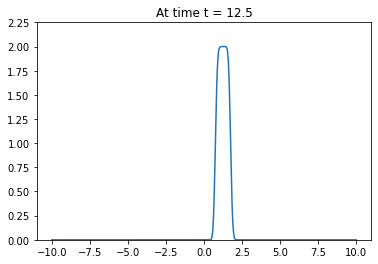

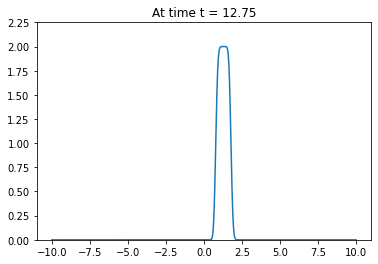

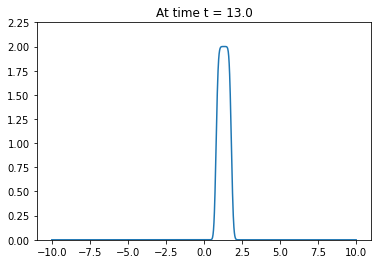

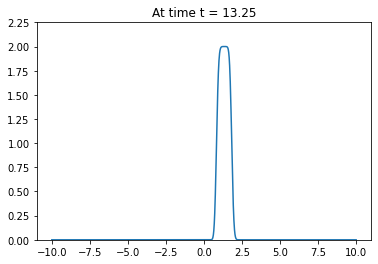

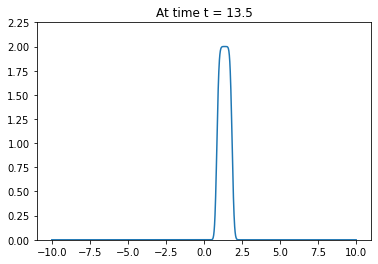

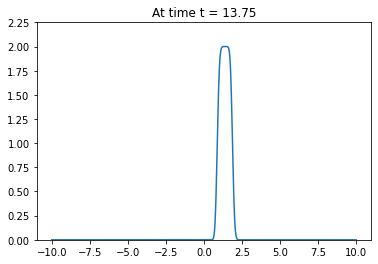

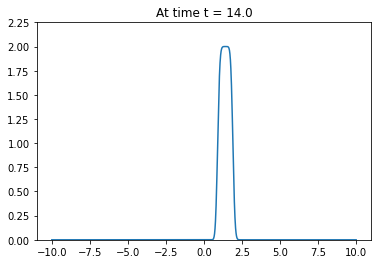

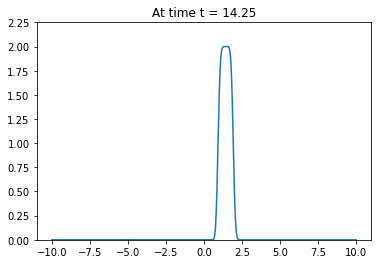

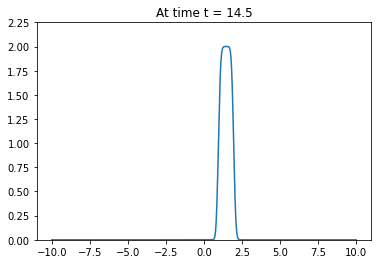

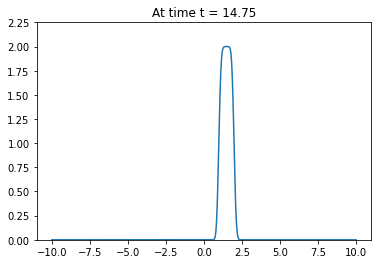

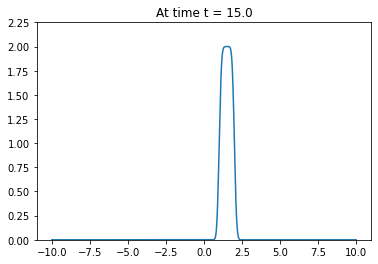

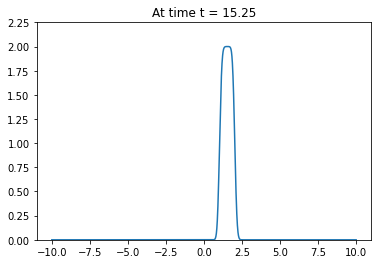

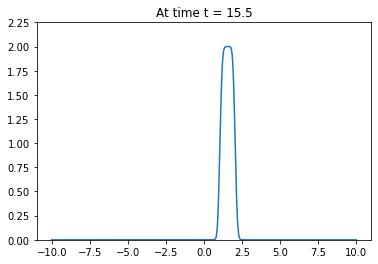

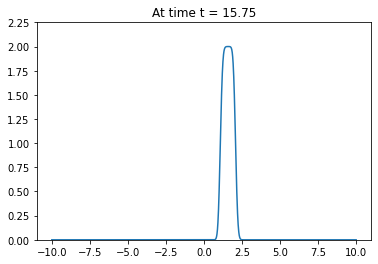

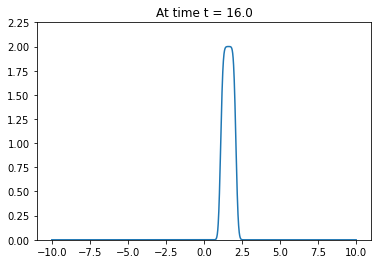

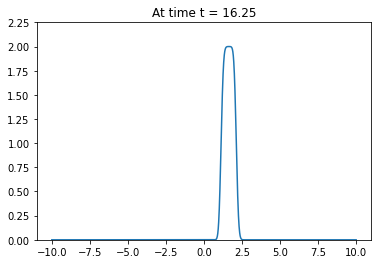

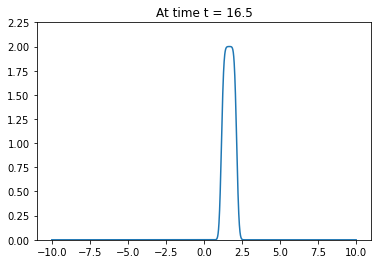

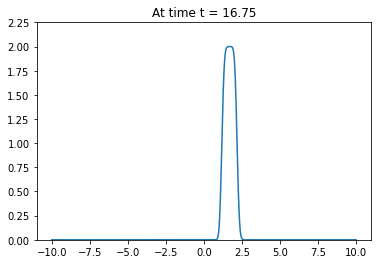

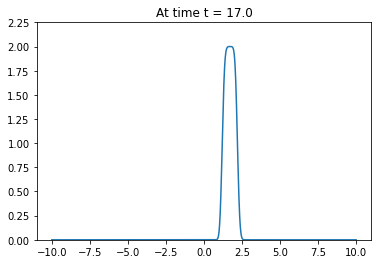

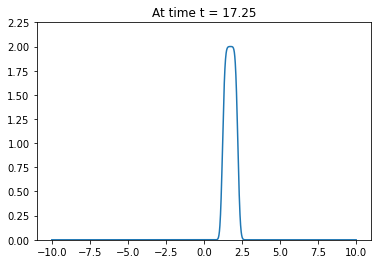

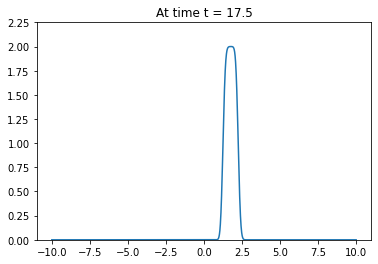

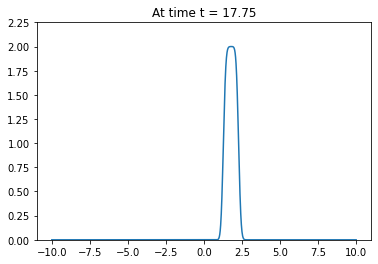

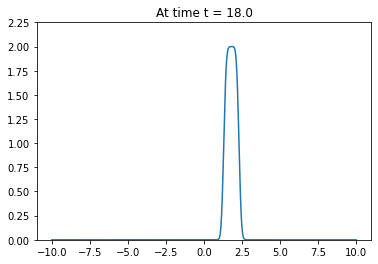

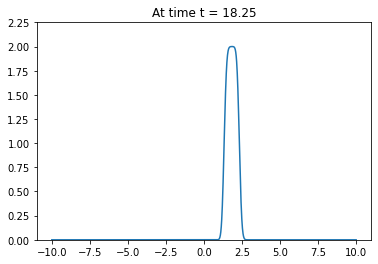

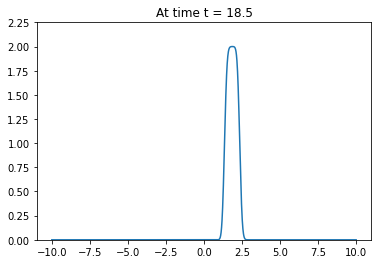

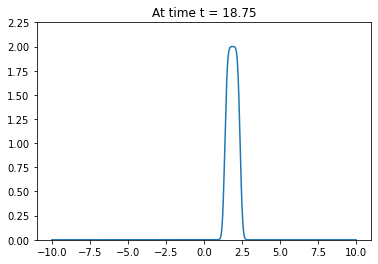

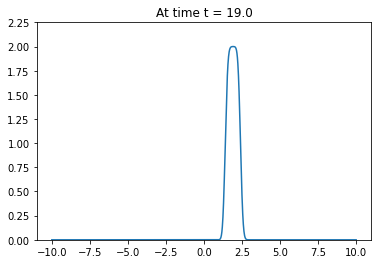

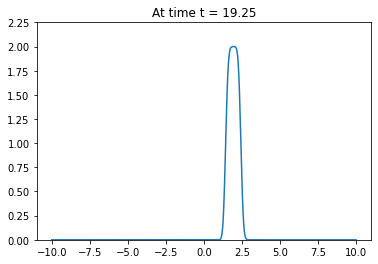

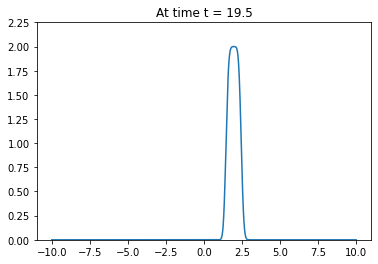

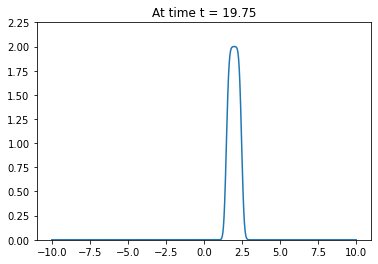

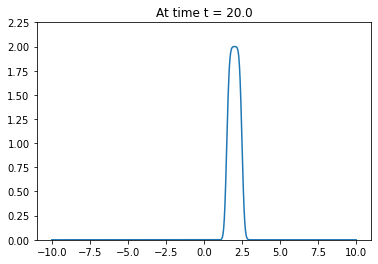

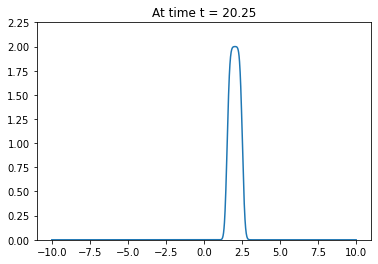

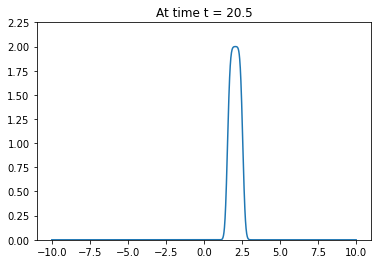

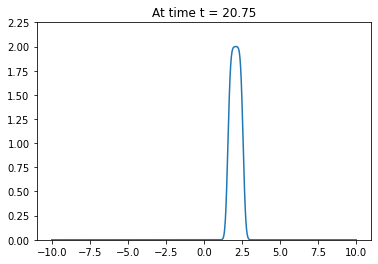

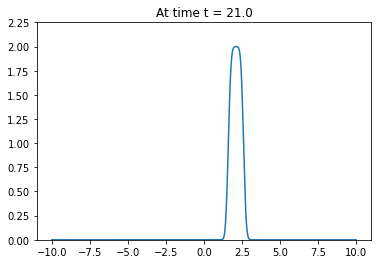

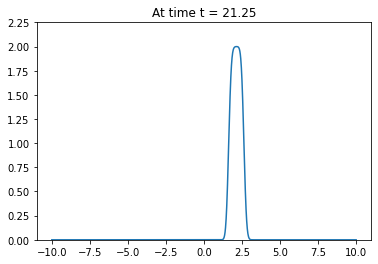

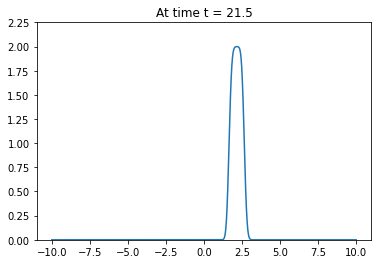

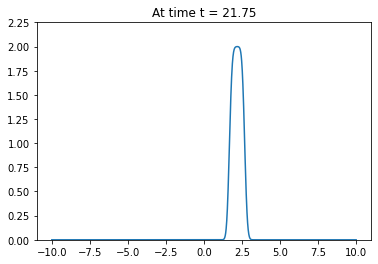

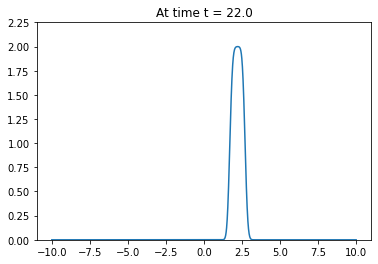

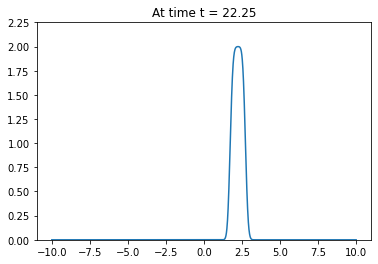

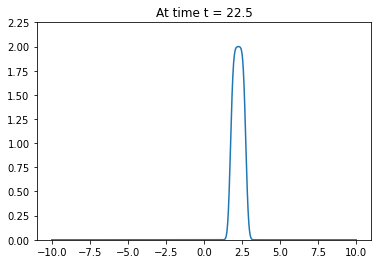

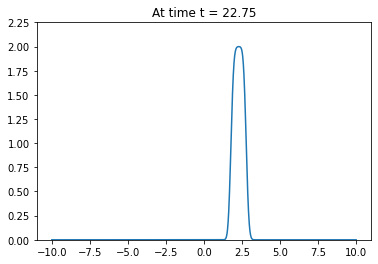

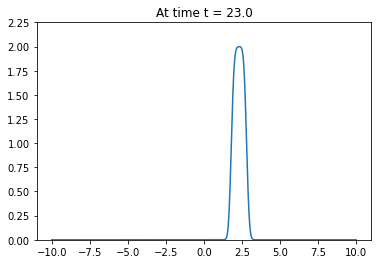

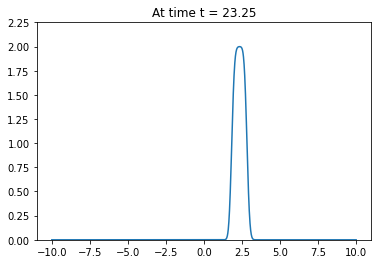

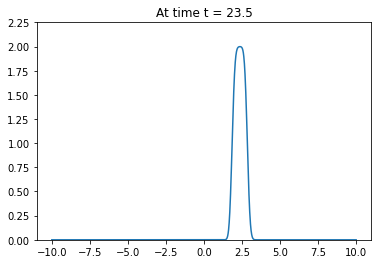

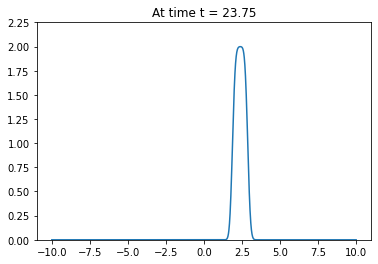

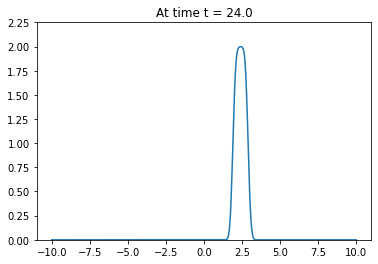

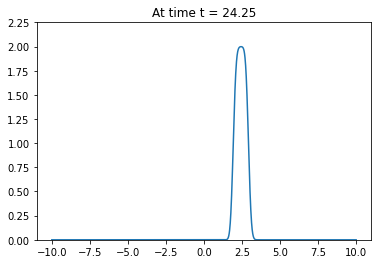

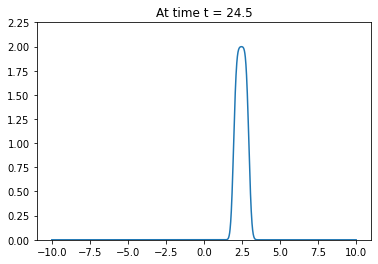

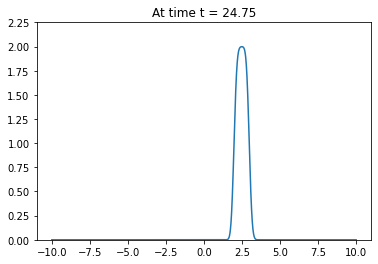

In [ ]:
#importing required libarries
import numpy as np
import matplotlib.pyplot as plt

#Creating interface for Cells and Cell centers
Nx = 2000
x_min , x_max = (-10, 10)

#defining cell Interface as x_int
x_int = np.linspace(x_min, x_max, Nx+1, endpoint = True)

#defining cell center as x
x = np.zeros(Nx)
dx = np.zeros(Nx)
for i in range(Nx):
  x[i] = 0.5*(x_int[i] + x_int[i+1])
  dx[i] = x_int[i+1] - x_int[i]


#Defining time for advection
t_min, t_max = (0, 25)
dt = 0.01
Nt = int((t_max - t_min)/dt)
t = np.linspace(t_min, t_max, Nt+1, endpoint=True)

#defining square pulse:
sq_pulse = 2*(abs(x) <= 0.5)

q = np.zeros([Nt+1, Nx])
sigma = np.zeros([Nt+1, Nx])
u = np.ones([Nt+1, Nx])*10

q[0, :] = sq_pulse


for n in range(Nt):

  for i in range(1, Nx-1):


    # u[n,:] = 0.25*(q[n,:]+q[n+1])

    if u[n,i] >= 0:
      theta1 = 1
      if (q[n,i]-q[n,i-1]) ==0:
        r1=0
      else:
        r1 = (q[n,i-1]-q[n,i-2])/(q[n,i]-q[n,i-1])
    else:
      if (q[n,i]-q[n,i-1]) ==0:
        r1=0
      else:
        r1 = (q[n,i+1]+q[n,i])/(q[n,i]-q[n,i-1])
      theta1 = -1

    if u[n,i+1] >= 0:
      if (q[n,i+1]-q[n,i]) ==0:
        r2=0
      else:
        r2 = (q[n,i]-q[n,i-1])/(q[n,i+1]-q[n,i])
      theta2 = 1
    else:
      if (q[n,i+1]-q[n,i]) ==0:
        r2=0
      else:
        if i == Nx-2:
          r2 = (q[n,0]+q[n,i+1])/(q[n,i+1]-q[n,i])  
        else:
          r2 = (q[n,i+2]+q[n,i+1])/(q[n,i+1]-q[n,i])
      theta2 = -1
    


    f1 = 0.5*u[n,i]*((1 + theta1)*q[n,i-1] + (1-theta1)*q[n,i]) + 0*0.25*abs(u[n,i])*(1 - abs(u[n,i]*dt/dx[i]))*dx[i]*((1+theta1)*sigma[n,i-1] + (1-theta1)*sigma[n,i])
    f2 = 0.5*u[n,i+1]*((1 + theta2)*q[n,i] + (1-theta2)*q[n,i+1]) + 0*0.25*abs(u[n,i+1])*(1 - abs(u[n,i+1]*dt/dx[i]))*dx[i]*((1+theta1)*sigma[n,i] + (1-theta1)*sigma[n,i+1])


    # f1 = 0.5*u[n,i]*((1 + theta1)*q[n,i-1] + (1-theta1)*q[n,i]) + 0.5*abs(u[n,i])*(1 - abs(u[n,i]*dt/dx[i]))*((r1+abs(r1))/(1+abs(r1)))*(q[n,i]-q[n,i-1])
    # f2 = 0.5*u[n,i+1]*((1 + theta2)*q[n,i] + (1-theta2)*q[n,i+1]) + 0.5*abs(u[n,i+1])*(1 - abs(u[n,i+1]*dt/dx[i]))*((r2+abs(r2))/(1+abs(r2)))*(q[n,i]-q[n,i-1])
    q[n+1,i] = q[n,i] + (100*dt*dx[i])*(f1 - f2)


  if n % 25 == 0:
    plt.plot(x, q[n])
    plt.title(f'At time t = {t[n]}')
    plt.ylim(0,2.25)
    # plt.xlim(-2.1, 2.1)
    plt.show()

## HYDRODYNAMIC SOLVER (Tried but failed miserably)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
q_1 = np.zeros([Nt, Nx])
q_2 = np.zeros([Nt, Nx])

cs = 1
# Defining function phi(r)
def phi(r):
    output = r
    return output
# initial density function
def density_fun(x,t):
    #return 2*(abs(x)<=2)
    if x>0 :
        THETA = 1
    else:
        THETA = 0
    return 2*THETA*(50-x) + 1

for i in range(0,Nx):

    q_1[0,i] = density_fun(x_space[i],0)



for n in range(0, Nt-1):
    for i in range(1, Nx-2):
        u_half_negi = 0.5*(q_2[n,i-1]/q_1[n,i-1] + q_2[n,i]/q_1[n,i])
        u_half_posi = 0.5*(q_2[n,i]/q_1[n,i] + q_2[n,i+1]/q_1[n,i+1])

        # negitive half interface
        if u_half_negi>=0:
            theta_negi = +1
            r_1_negi = (q_1[n,i-1] - q_1[n,i-2])/(q_1[n,i] - q_1[n, i-1])
            r_2_negi = (q_2[n,i-1] - q_2[n,i-2])/(q_2[n,i] - q_2[n, i-1])
        elif u_half_negi<0:
            theta_negi = -1
            r_1_negi = (q_1[n,i+1] - q_1[n,i])/(q_1[n,i] - q_1[n, i-1])
            r_2_negi = (q_2[n,i+1] - q_2[n,i])/(q_2[n,i] - q_2[n, i-1])


        # positive half interface
        if u_half_posi>=0:
            theta_posi = +1
            r_1_posi = (q_1[n,i] - q_1[n,i-1])/(q_1[n,i+1] - q_1[n, i])
            r_2_posi = (q_2[n,i] - q_2[n,i-1])/(q_2[n,i+1] - q_2[n, i])
        elif u_half_posi<0:
            theta_posi = -1
            r_1_posi = (q_1[n,i+2] - q_1[n,i+1])/(q_1[n,i+1] - q_1[n, i])
            r_2_posi = (q_2[n,i+2] - q_2[n,i+1])/(q_2[n,i+1] - q_2[n, i])
        

        f_1_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_1[n, i-1] + ( 1 - theta_negi)* q_1[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_1[n, i] - q_1[n, i-1])
        f_1_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_1[n, i] + ( 1 - theta_posi)* q_1[n, i+1]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_1[n, i+1] - q_1[n, i])

        f_2_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_2[n, i-1] + ( 1 - theta_negi)* q_2[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_2[n, i] - q_2[n, i-1])
        f_2_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_2[n, i] + ( 1 - theta_posi)* q_2[n, i+1]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_2[n, i+1] - q_2[n, i])

        q_1[n+1,i] = q_1[n,i] - r*(f_1_posi - f_1_negi)
        q_2[n+1, i] = q_2[n,i] - r*(f_2_posi - f_2_negi) - (q_1[n+1, i+1] - q_1[n+1, i])*(cs**2)/delta_x
    #------------------------------------------------------------------------------------------------------------------------
    u_half_negi = 0.5*(q_2[n,Nx-1]/q_1[n,Nx-1] + q_2[n,i]/q_1[n,i])
    u_half_posi = 0.5*(q_2[n,i]/q_1[n,i] + q_2[n,1]/q_1[n,1])

    # negitive half interface
    if u_half_negi >= 0:
        theta_negi = +1
        r_1_negi = (q_1[n,Nx-1] - q_1[n,Nx-2])/(q_1[n,0] - q_1[n, Nx-1])
        r_2_negi = (q_2[n,Nx-1] - q_2[n,Nx-2])/(q_2[n,0] - q_2[n, Nx-1])
    elif u_half_negi < 0:
        theta_negi = -1
        r_1_negi = (q_1[n,1] - q_1[n,0])/(q_1[n,0] - q_1[n, Nx-1])
        r_2_negi = (q_2[n,1] - q_2[n,0])/(q_2[n,0] - q_2[n, Nx-1])


    # positive half interface
    if u_half_posi >= 0:
        theta_posi = +1
        r_1_posi = (q_1[n,0] - q_1[n,Nx-1])/(q_1[n,1] - q_1[n, 0])
        r_2_posi = (q_2[n,0] - q_2[n,Nx-1])/(q_2[n,1] - q_2[n, 0])
    elif u_half_posi<0:
        theta_posi = -1
        r_1_posi = (q_1[n,2] - q_1[n,1])/(q_1[n,1] - q_1[n, 0])
        r_2_posi = (q_2[n,2] - q_2[n,1])/(q_2[n,1] - q_2[n, 0])


    f_1_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_1[n, Nx-1] + ( 1 - theta_negi)* q_1[n, 0]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_1[n, 0] - q_1[n, Nx-1])
    f_1_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_1[n, 0] + ( 1 - theta_posi)* q_1[n, 1]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_1[n, 1] - q_1[n, 0])

    f_2_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_2[n, Nx-1] + ( 1 - theta_negi)* q_2[n, 0]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_2[n, 0] - q_2[n, Nx-1])
    f_2_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_2[n, 0] + ( 1 - theta_posi)* q_2[n, 1]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_2[n, 1] - q_2[n, 0])

    q_1[n+1,0] = q_1[n,0] - r*(f_1_posi - f_1_negi)
    q_2[n+1, 0] = q_2[n,0] - r*(f_2_posi - f_2_negi) - (q_1[n+1, 1] - q_1[n+1, 0])*(cs**2)/delta_x
    #---------------------------------------------------------------------------------------------------------------
    i = 1
    

    u_half_negi = 0.5*(q_2[n,0]/q_1[n,0] + q_2[n,i]/q_1[n,i])
    u_half_posi = 0.5*(q_2[n,i]/q_1[n,i] + q_2[n,2]/q_1[n,2])

    # negitive half interface
    if u_half_negi >= 0:
        theta_negi = +1
        r_1_negi = (q_1[n,0] - q_1[n,Nx-1])/(q_1[n,1] - q_1[n, 0])
        r_2_negi = (q_2[n,0] - q_2[n,Nx-1])/(q_2[n,1] - q_2[n, 0])
    elif u_half_negi < 0:
        theta_negi = -1
        r_1_negi = (q_1[n,2] - q_1[n,i])/(q_1[n,1] - q_1[n, 0])
        r_2_negi = (q_2[n,2] - q_2[n,i])/(q_2[n,i] - q_2[n, 0])


    # positive half interface
    if u_half_posi >= 0:
        theta_posi = +1
        r_1_posi = (q_1[n,i] - q_1[n,0])/(q_1[n,2] - q_1[n, i])
        r_2_posi = (q_2[n,i] - q_2[n,0])/(q_2[n,2] - q_2[n, i])
    elif u_half_posi<0:
        theta_posi = -1
        r_1_posi = (q_1[n,3] - q_1[n,2])/(q_1[n,2] - q_1[n, i])
        r_2_posi = (q_2[n,3] - q_2[n,2])/(q_2[n,2] - q_2[n, i])


    f_1_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_1[n, 0] + ( 1 - theta_negi)* q_1[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_1[n, i] - q_1[n, 0])
    f_1_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_1[n, i] + ( 1 - theta_posi)* q_1[n, 2]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_1[n, 2] - q_1[n, i])

    f_2_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_2[n, 0] + ( 1 - theta_negi)* q_2[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_2[n, i] - q_2[n, 0])
    f_2_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_2[n, i] + ( 1 - theta_posi)* q_2[n, 2]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_2[n, 2] - q_2[n, i])

    q_1[n+1,i] = q_1[n,i] - r*(f_1_posi - f_1_negi)
    q_2[n+1, i] = q_2[n,i] - r*(f_2_posi - f_2_negi) - (q_1[n+1, 2] - q_1[n+1, i])*(cs**2)/delta_x
    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

    i=Nx-2
    u_half_negi = 0.5*(q_2[n,Nx-3]/q_1[n,Nx-3] + q_2[n,i]/q_1[n,i])
    u_half_posi = 0.5*(q_2[n,i]/q_1[n,i] + q_2[n,i+1]/q_1[n,Nx-1])

    # negitive half interface
    if u_half_negi >= 0:
        theta_negi = +1
        r_1_negi = (q_1[n,Nx-3] - q_1[n,Nx-4])/(q_1[n,i] - q_1[n, Nx-3])
        r_2_negi = (q_2[n,Nx-3] - q_2[n,Nx-4])/(q_2[n,i] - q_2[n, Nx-3])
    elif u_half_negi < 0:
        theta_negi = -1
        r_1_negi = (q_1[n,Nx-1] - q_1[n,i])/(q_1[n,i] - q_1[n, Nx-3])
        r_2_negi = (q_2[n,Nx-1] - q_2[n,i])/(q_2[n,i] - q_2[n, Nx-3])


    # positive half interface
    if u_half_posi >= 0:
        theta_posi = +1
        r_1_posi = (q_1[n,i] - q_1[n,Nx-3])/(q_1[n,Nx-1] - q_1[n, i])
        r_2_posi = (q_2[n,i] - q_2[n,Nx-3])/(q_2[n,Nx-1] - q_2[n, i])
    elif u_half_posi<0:
        theta_posi = -1
        r_1_posi = (q_1[n,Nx] - q_1[n,Nx-1])/(q_1[n,Nx-1] - q_1[n, i])
        r_2_posi = (q_2[n,Nx] - q_2[n,Nx-1])/(q_2[n,Nx-1] - q_2[n, i])


    f_1_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_1[n, Nx-3] + ( 1 - theta_negi)* q_1[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_1[n, i] - q_1[n, Nx-3])
    f_1_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_1[n, i] + ( 1 - theta_posi)* q_1[n, Nx-1]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_1[n, Nx-1] - q_1[n, i])

    f_2_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_2[n, Nx-3] + ( 1 - theta_negi)* q_2[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_2[n, i] - q_2[n, Nx-3])
    f_2_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_2[n, i] + ( 1 - theta_posi)* q_2[n, Nx-1]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_2[n, Nx-1] - q_2[n, i])

    q_1[n+1,i] = q_1[n,i] - r*(f_1_posi - f_1_negi)
    q_2[n+1, i] = q_2[n,i] - r*(f_2_posi - f_2_negi) - (q_1[n+1, Nx-1] - q_1[n+1, i])*(cs**2)/delta_x
    # #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

    i = Nx-1

    u_half_negi = 0.5*(q_2[n,i-1]/q_1[n,i-1] + q_2[n,i]/q_1[n,i])
    u_half_posi = 0.5*(q_2[n,i]/q_1[n,i] + q_2[n,0]/q_1[n,0])

    # negitive half interface
    if u_half_negi >= 0:
        theta_negi = +1
        r_1_negi = (q_1[n,i-1] - q_1[n,i-2])/(q_1[n,i] - q_1[n, i-1])
        r_2_negi = (q_2[n,i-1] - q_2[n,i-2])/(q_2[n,i] - q_2[n, i-1])
    elif u_half_negi < 0:
        theta_negi = -1
        r_1_negi = (q_1[n,0] - q_1[n,i])/(q_1[n,i] - q_1[n, i-1])
        r_2_negi = (q_2[n,0] - q_2[n,i])/(q_2[n,i] - q_2[n, i-1])


    # positive half interface
    if u_half_posi >= 0:
        theta_posi = +1
        r_1_posi = (q_1[n,i] - q_1[n,i-1])/(q_1[n,0] - q_1[n, i])
        r_2_posi = (q_2[n,i] - q_2[n,i-1])/(q_2[n,0] - q_2[n, i])
    elif u_half_posi<0:
        theta_posi = -1
        r_1_posi = (q_1[n,1] - q_1[n,0])/(q_1[n,0] - q_1[n, i])
        r_2_posi = (q_2[n,1] - q_2[n,0])/(q_2[n,0] - q_2[n, i])


    f_1_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_1[n, i-1] + ( 1 - theta_negi)* q_1[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_1[n, i] - q_1[n, i-1])
    f_1_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_1[n, i] + ( 1 - theta_posi)* q_1[n, 0]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_1[n, 0] - q_1[n, i])

    f_2_negi = 0.5*u_half_negi*(( 1 + theta_negi)* q_2[n, i-1] + ( 1 - theta_negi)* q_2[n, i]) + 0.5*np.abs(u_half_negi)*(1 - np.abs( u_half_negi * delta_t )/delta_x )*phi(r_1_negi)*( q_2[n, i] - q_2[n, i-1])
    f_2_posi = 0.5*u_half_posi*(( 1 + theta_posi)* q_2[n, i] + ( 1 - theta_posi)* q_2[n, 0]) + 0.5*np.abs(u_half_posi)*(1 - np.abs( u_half_posi * delta_t )/delta_x )*phi(r_1_posi)*( q_2[n, 0] - q_2[n, i])

    q_1[n+1,i] = q_1[n,i] - r*(f_1_posi - f_1_negi)
    q_2[n+1, i] = q_2[n,i] - r*(f_2_posi - f_2_negi) - (q_1[n+1, 0] - q_1[n+1, i])*(cs**2)/delta_x
